In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control

## PT2 process with I controller


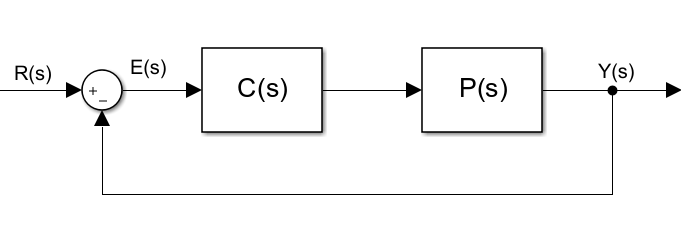

Controller:

$$ C(s) = \frac{1}{T_I s} $$

Process:

$$ P(s) = \frac{k}{1 + 2\xi T s + T^2 s^2} $$

In [13]:
# the controller
TI = 5
numC = 1
denC = [TI, 0]
C = control.tf(numC, denC)

# the process
k = 0.9
T = 5
xi = 0.8
numP = k
denP = [T**2, 2*xi*T, 1]
P = control.tf(numP, denP)

In [22]:
# the open loop
G0 = control.series(C,P)

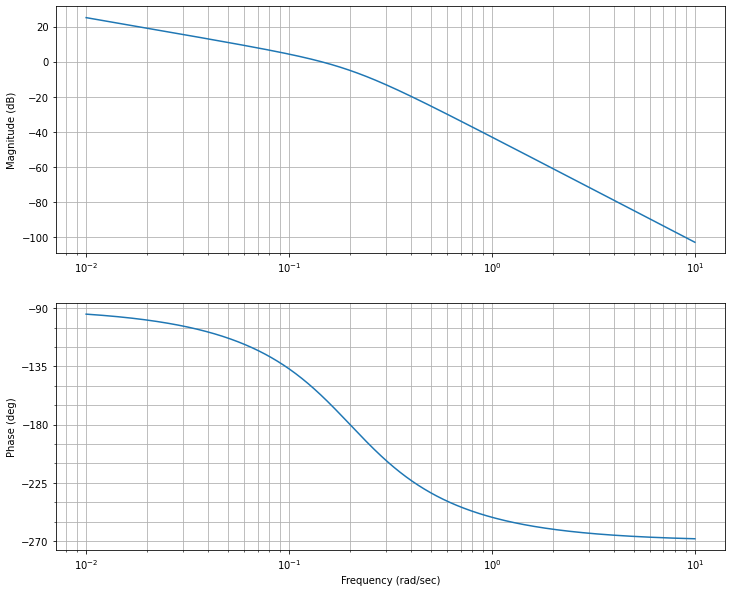

In [15]:
# Bode-plot of the open loop
plt.figure(figsize=(12,10))
Mag, Phase, freq = control.bode(G0, dB=True)

TypeError: cannot unpack non-iterable int object

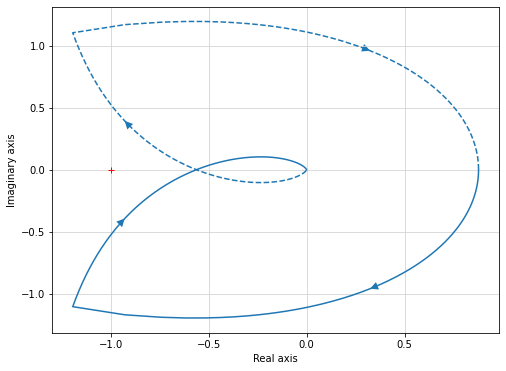

In [23]:
# Nyquist-plot (CTB)
plt.figure(figsize=(8,6))
omega = np.logspace(-4,2,1000)
real, imag, freq = control.nyquist(G0,omega=omega)
plt.ylim([-10,10]);

In [24]:
# Nyquist-plot
plt.figure(figsize=(8,6))
plt.plot(real,imag), plt.grid(True)
plt.ylim([-10,2]), plt.scatter(-1,0, color='r');

NameError: name 'real' is not defined

<Figure size 576x432 with 0 Axes>

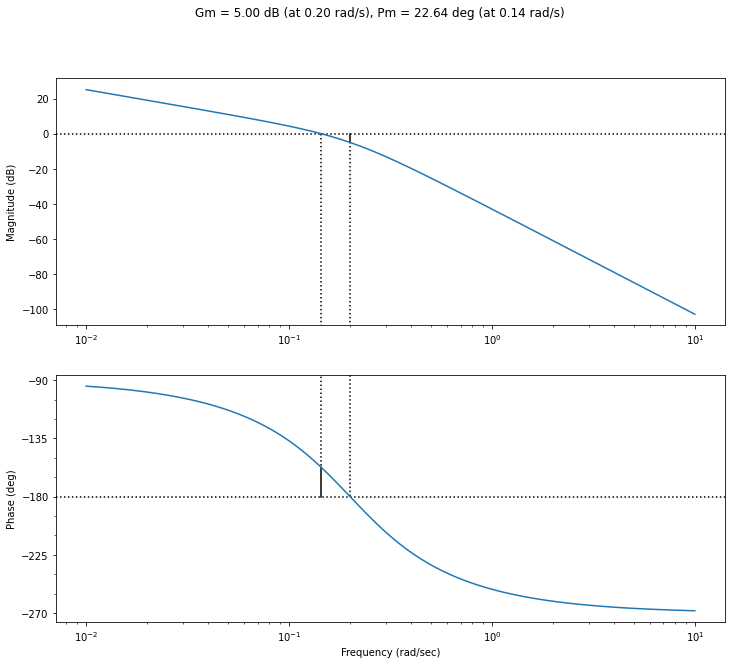

In [25]:
# Bode-plot with stability margins (CTB)
plt.figure(figsize=(12,10))
Mag, Phase, freq = control.bode(G0, dB=True, margins=True)

In [ ]:
# stability margin
gm, pm, sm, pc, gc, sc = control.stability_margins(G0)
gm, pm, sm, pc, gc, sc

In [ ]:
# gain margin in dB
gm_dB = 20*np.log10(gm)
gm_dB

In [ ]:
# Bode-plot with margins
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.semilogx(freq,20*np.log10(Mag)), plt.grid(True)
plt.semilogx(freq, 0*Mag,'r:')
plt.vlines(pc, -20*np.log10(gm), 0, colors='r')
plt.subplot(2,1,2)
plt.semilogx(freq,np.degrees(Phase)), plt.grid(True)
plt.semilogx(freq, 0*Phase - 180,'r:')
plt.vlines(gc, -180, -180 + pm, colors='r');

In [26]:
# the closed loop system
G = control.feedback(G0)

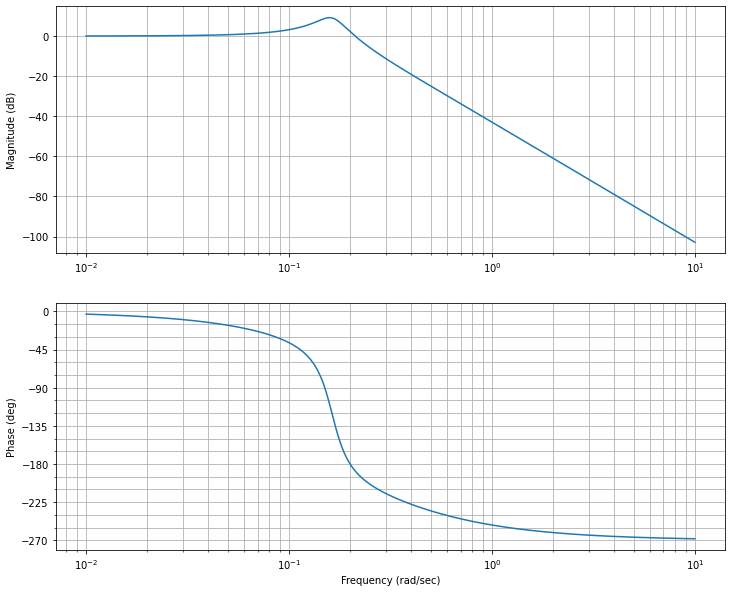

In [27]:
# Bode-plot of the closed
plt.figure(figsize=(12,10))
Mag, Phase, freq = control.bode(G, dB=True)

In [ ]:
# step response of the closed loop
time = np.linspace(0,500,1000)
t,y = control.step_response(G, time)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(t,y), plt.grid(True), plt.xlabel('t'), plt.ylabel('y(t)');

In [ ]:
# step response info
control.step_info(G)

**HW.:** Try the same with a PT3+I controller loop!

In [49]:
# the controller
TI = 5
numC = 1
denC = [TI, 0]
C = control.tf(numC, denC)

# the process
k = 0.9
T = 5
numP = k
denP = [T, 1]
P1 = control.tf(numP, denP)
P3 = control.series(P1, P1, P1)

In [50]:
# open and closed loop
G0 = control.series(C,P3)
G = control.feedback(G0)

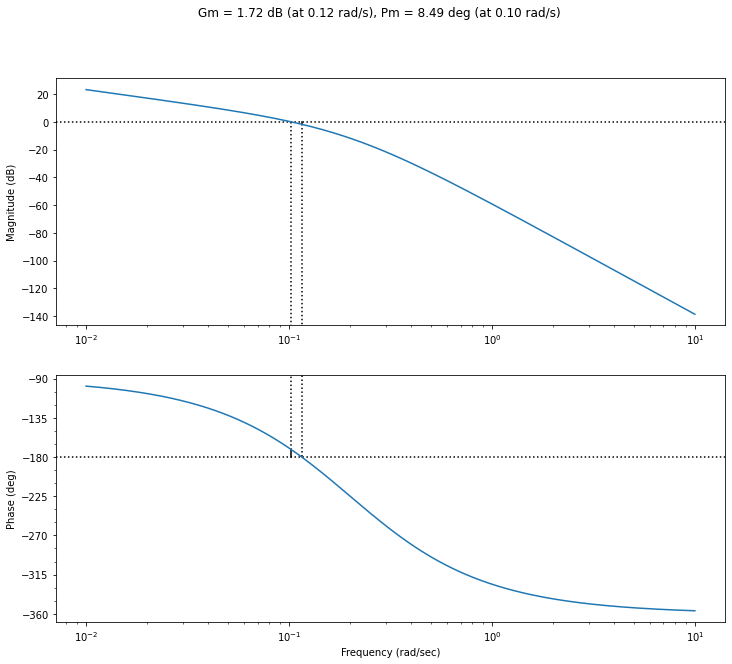

In [53]:
# Bode plot of the open loop with margins
plt.figure(figsize=(12,10))
Mag, Phase, freq = control.bode(G0, dB=True, margins=True)

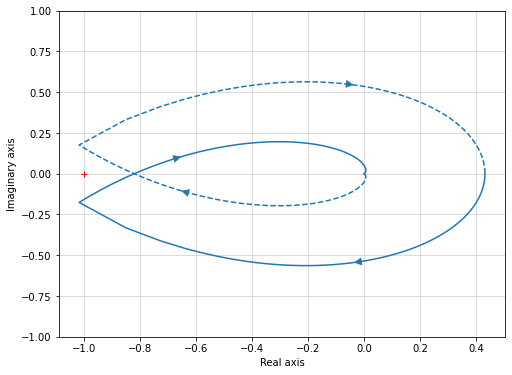

In [57]:
# Nyquist-plot of the open loop
plt.figure(figsize=(8,6))
omega = np.logspace(-4,2,1000)
control.nyquist(G0,omega=omega)
plt.ylim([-1,1]);

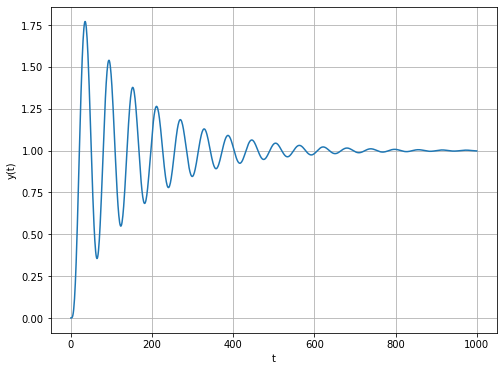

In [51]:
# step response of the closed loop
time = np.linspace(0,1000,1000)
t,y = control.step_response(G, time)
plt.figure(figsize=(8,6))
plt.plot(t,y), plt.grid(True), plt.xlabel('t'), plt.ylabel('y(t)');